In [1]:
import numpy as np
import matplotlib.pyplot as plt

from meccomp_lib import *

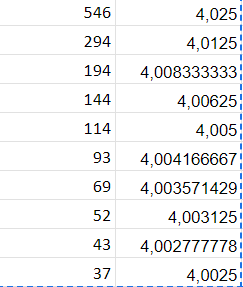


In [2]:
import numpy as np

# Substitua estes valores pelos seus dados
x = np.array([546, 294, 194, 144, 114, 93, 69, 52, 43, 37])
y = np.array([4.0425, 4.0125, 4.083333333, 4.00625, 4.005, 4.004166667, 4.003571429, 4.003125, 4.002777778, 4.0025])

# Calculando a média de x e y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculando a inclinação (m)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
m = numerator / denominator

# Calculando o intercepto (b)
b = y_mean - (m * x_mean)

print(f"A inclinação (m) é: {m}")
print(f"O intercepto (b) é: {b}")

# Previsão usando a linha de melhor ajuste
y_pred = m * x + b
print(f"Valores previstos de y: {y_pred}")


A inclinação (m) é: 8.600855588604043e-05
O intercepto (b) é: 4.0029314637364735
Valores previstos de y: [4.04989214 4.02821798 4.01961712 4.0153167  4.01273644 4.01093026
 4.00886605 4.00740391 4.00662983 4.00611378]



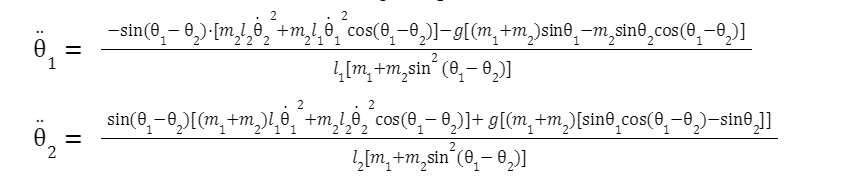


current_state [0.   0.05  nan 0.   0.1   nan]
[ 0.00055167  0.005285    0.00026667  0.00110667  0.01046333 -0.00052667]
next_state =  [ 0.00055167  0.055285   -0.          0.00110667  0.11046333  0.        ]

current_state [ 0.00055167  0.055285   -0.          0.00110667  0.11046333  0.        ]
[ 0.00067     0.00590333  0.00086667  0.00133667  0.011435   -0.00172667]
next_state =  [ 0.00122167  0.06118833  0.0055      0.00244333  0.12189833 -0.0109    ]

current_state [ 0.00122167  0.06118833  0.0055      0.00244333  0.12189833 -0.0109    ]
[ 0.000805    0.00660333  0.00158333  0.001605    0.01249167 -0.003165  ]
next_state =  [ 0.00202667  0.06779167  0.012       0.00404833  0.13439    -0.024     ]

current_state [ 0.00202667  0.06779167  0.012       0.00404833  0.13439    -0.024     ]
[ 0.000965    0.007385    0.00243     0.00190833  0.01362333 -0.004875  ]
next_state =  [ 0.00299167  0.07517667  0.0199      0.00595667  0.14801333 -0.0397    ]

current_state [ 0.00299167  0.0751766

c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\leg_system.py:41: RuntimeWarning: overflow encountered in scalar power
  num = (-np.sin(theta_1-theta_2)*(self.m2*self.l2*(theta_2_dot**2)
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\leg_system.py:42: RuntimeWarning: overflow encountered in scalar power
  +self.m2*self.l1*(theta_1_dot**2)*np.cos(theta_1-theta_2))
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\leg_system.py:52: RuntimeWarning: overflow encountered in scalar power
  num = (np.sin(theta_1-theta_2)*((self.m1+self.m2)*self.l1*(theta_1_dot**2)
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\leg_system.py:53: RuntimeWarning: overflow encountered in scalar power
  +self.m2*self.l2*(theta_2_dot**2)*np.cos(theta_1-theta_2))
c:\Users\guilh\OneDrive\Área de Trabalho\Faculdade\PMR3401\EP1\meccomp_lib\leg_system.py:41: RuntimeWarning: invalid value encountered in scalar add


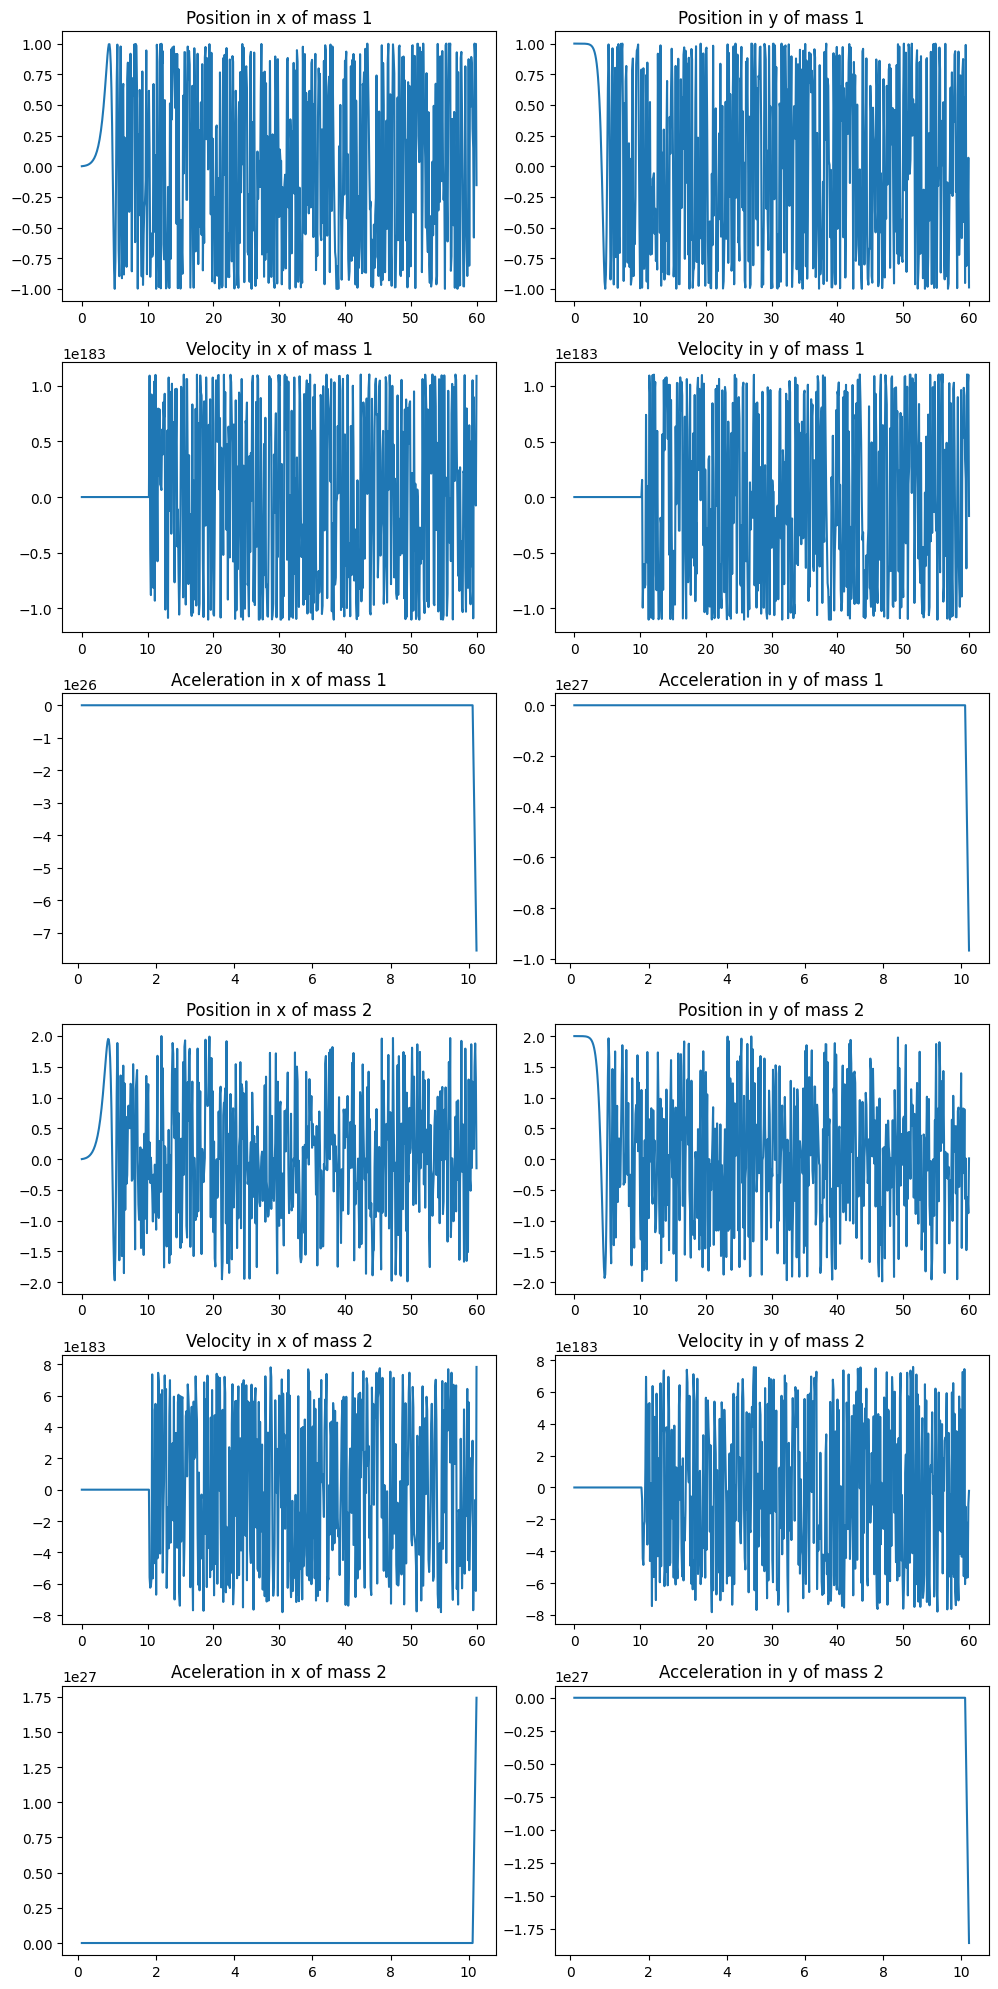

In [19]:
class RK4:
    def __init__(self, step:float=0.01, simulation_time:float = 10):
        self.step = step
        self.n_steps = int(simulation_time/step)
        self.system = System(step=step)
    
    def apply_f(self, state):
        theta_1 = state[0]
        theta_1_dot = state[1]
        theta_2 = state[3]
        theta_2_dot = state[4]
        state_kwargs ={
            'theta_1' : theta_1,
            'theta_1_dot' : theta_1_dot,
            'theta_2' : theta_2,
            'theta_2_dot' : theta_2_dot, 
        }
        
        next_theta_1 = theta_1 + self.step*theta_1_dot
        next_theta_1_dot_dot = self.system.theta_1_dot_dot(**state_kwargs)
        next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
        
        next_theta_2 = theta_2 + self.step*theta_2_dot
        next_theta_2_dot_dot = self.system.theta_2_dot_dot(**state_kwargs)
        next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
        
        next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                        next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
        
        next_state = [0 if np.isnan(x) else x for x in next_state]
        next_state = [0 if np.isinf(x) else x for x in next_state]
    
        next_state = [round(value,4) for value in next_state]

        return next_state
        
        
    def simul(self):
        self.system.reset()
        for time_step in range(self.n_steps): #self.n_steps
            current_state = self.system.get_current_state()
            current_state = np.array(list(current_state.values()))
            
            print("\ncurrent_state",current_state)
            
            k1 = self.apply_f(current_state)
            k1 = np.array(k1)
            #print("k1",k1)
            
            k2_state = current_state + (self.step/2)*k1
            k2 = self.apply_f(k2_state)
            k2 = np.array(k2)
            #print("k2",k2)
            k3_state = current_state + (self.step/2)*k2
            k3 = self.apply_f(k3_state)
            k3 = np.array(k3)
            #print("k3",k3)
            
            k4_state = current_state + (self.step)*k3
            k4 = self.apply_f(k4_state)
            #print("k4",k4)
            
            next_state = current_state + (self.step/6)*(k1 + 2*k2 + 2*k3 + k4)
            next_state[2] = k1[2]
            next_state[5] = k1[5]
            print((self.step/6)*(k1 + 2*k2 + 2*k3 + k4))
            print("next_state = ", next_state)
            #next_state = next_state.fillna(0)
            
            self.system.insert_state(list(next_state))
            
    def plot_results(self):        
        time_vector = np.arange(0, self.step*(self.n_steps+1), self.step)
        scalar_states = self.system.retrieve_scalar_states()
        scalar_states = np.array(scalar_states).reshape(self.n_steps+1,12)
        x_1_pos = scalar_states[:,0]
        y_1_pos = scalar_states[:,1]
        x_1_dot = scalar_states[:,2]
        y_1_dot = scalar_states[:,3]
        x_1_dot_dot = scalar_states[:,4]
        y_1_dot_dot = scalar_states[:,5]
        x_2_pos = scalar_states[:,6]
        y_2_pos = scalar_states[:,7]
        x_2_dot = scalar_states[:,8]
        y_2_dot = scalar_states[:,9]
        x_2_dot_dot = scalar_states[:,10]
        y_2_dot_dot = scalar_states[:,11]
        
        fig, axs = plt.subplots(6, 2, figsize=(10, 20))
        
        axs[0, 0].plot(time_vector, x_1_pos)
        axs[0, 0].set_title(f'Position in x of mass 1')
        axs[0, 1].plot(time_vector, y_1_pos)
        axs[0, 1].set_title(f'Position in y of mass 1')
        axs[1, 0].plot(time_vector, x_1_dot)
        axs[1, 0].set_title(f'Velocity in x of mass 1')
        axs[1, 1].plot(time_vector, y_1_dot)
        axs[1, 1].set_title(f'Velocity in y of mass 1')
        axs[2, 0].plot(time_vector, x_1_dot_dot)
        axs[2, 0].set_title(f'Aceleration in x of mass 1')
        axs[2, 1].plot(time_vector, y_1_dot_dot)
        axs[2, 1].set_title(f'Acceleration in y of mass 1')
        axs[3, 0].plot(time_vector, x_2_pos)
        axs[3, 0].set_title(f'Position in x of mass 2')
        axs[3, 1].plot(time_vector, y_2_pos)
        axs[3, 1].set_title(f'Position in y of mass 2')
        axs[4, 0].plot(time_vector, x_2_dot)
        axs[4, 0].set_title(f'Velocity in x of mass 2')
        axs[4, 1].plot(time_vector, y_2_dot)
        axs[4, 1].set_title(f'Velocity in y of mass 2')
        axs[5, 0].plot(time_vector, x_2_dot_dot)
        axs[5, 0].set_title(f'Aceleration in x of mass 2')
        axs[5, 1].plot(time_vector, y_2_dot_dot)
        axs[5, 1].set_title(f'Acceleration in y of mass 2')
        plt.tight_layout()
        plt.show()

        
        
rk = RK4(step=0.1, simulation_time=60)


rk.simul()

rk.plot_results()

In [18]:
a = {'oi':1,
     'b':2.09087,
     'a':1.2}

np.array(list(a.values()))

array([1.     , 2.09087, 1.2    ])

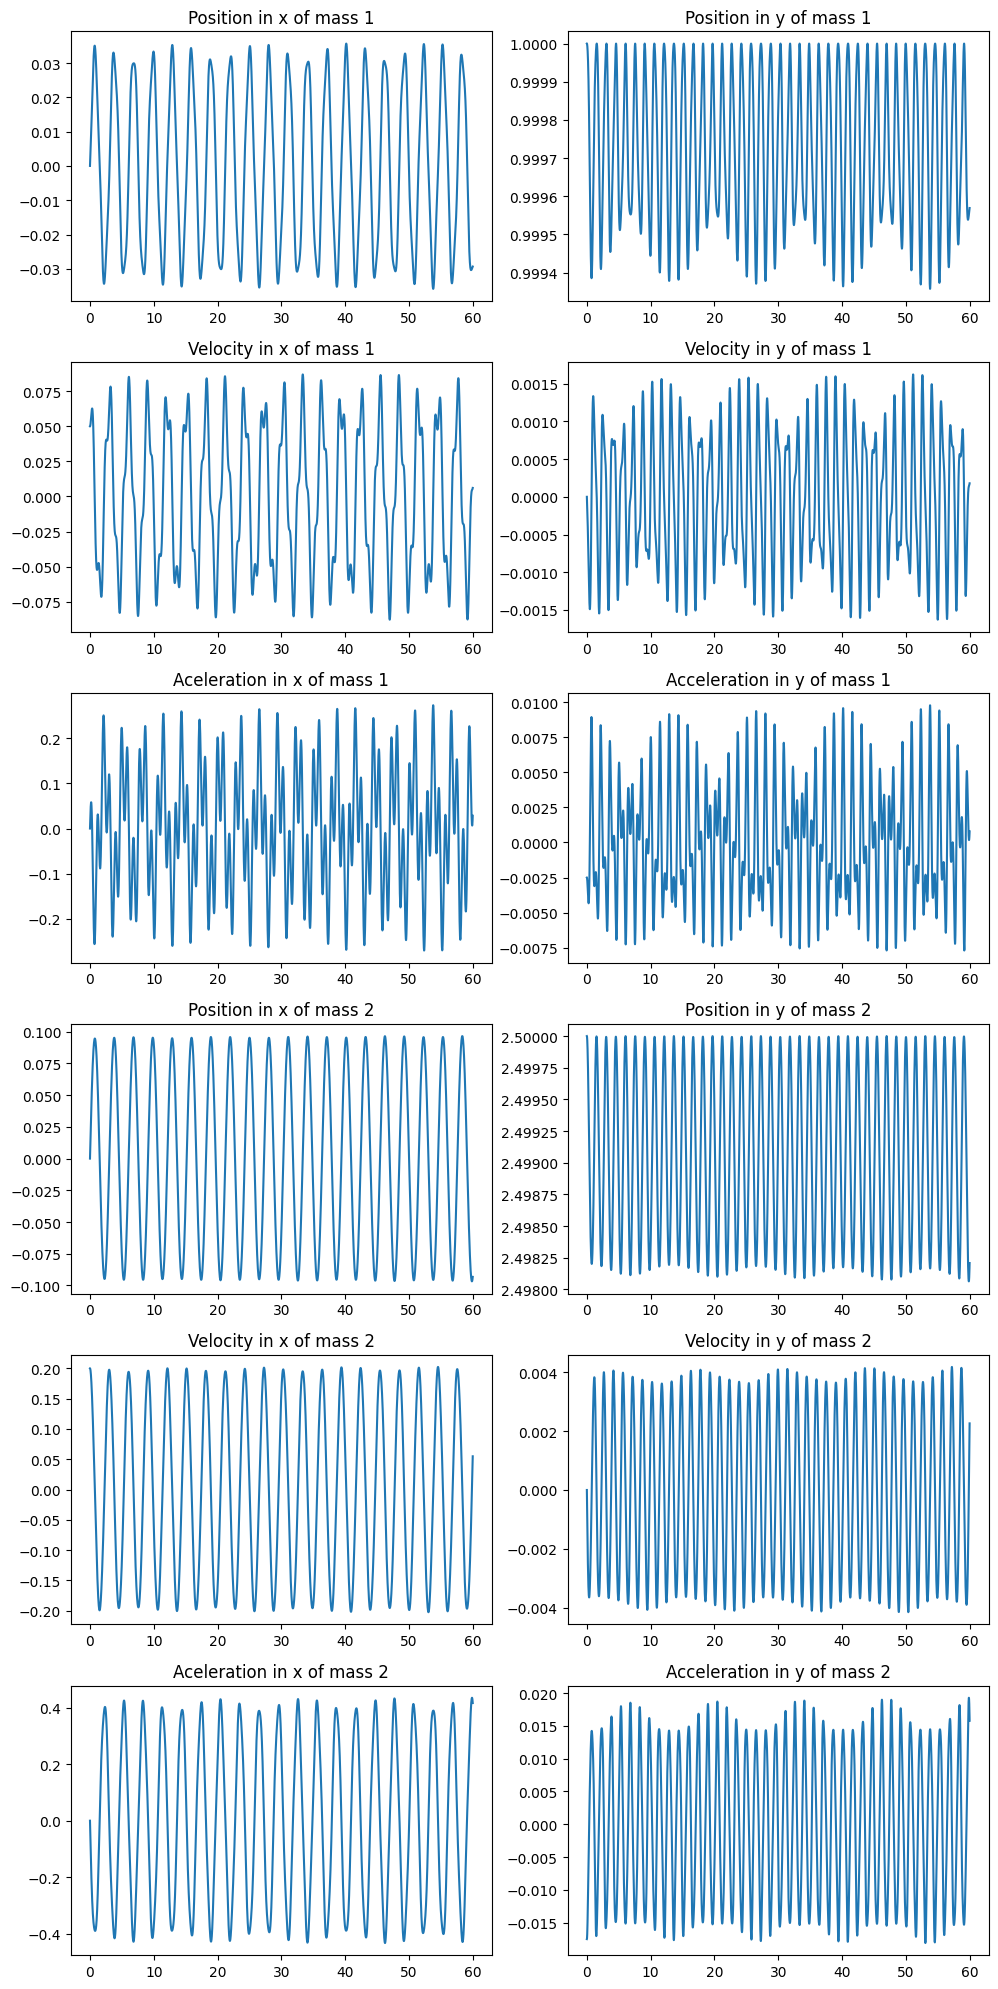

In [2]:
eu = Euler(step=0.0001, simulation_time=60)


eu.simul()

eu.plot_results()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class RungeKutta4:
    def __init__(self, step:float=0.01, simulation_time:float = 10):
        self.step = step
        self.n_steps = int(simulation_time/step)
        self.system = System(step=step)
        
    def step_rk4(self, current_state):
        k1 = self.system.derivative(**current_state)
        k2 = self.system.derivative(**{key: value + self.step * k1[key] / 2 for key, value in current_state.items()})
        k3 = self.system.derivative(**{key: value + self.step * k2[key] / 2 for key, value in current_state.items()})
        k4 = self.system.derivative(**{key: value + self.step * k3[key] for key, value in current_state.items()})
        
        next_state = {key: value + self.step * (k1[key] + 2*k2[key] + 2*k3[key] + k4[key]) / 6 for key, value in current_state.items()}
        
        return next_state
    
    def simul(self):
        self.system.reset()
        current_state = self.system.get_current_state()
        for _ in range(self.n_steps):
            current_state = self.step_rk4(current_state)
            self.system.insert_state(current_state)
            
    def plot_results(self):        
        time_vector = np.arange(0, self.step*(self.n_steps+1), self.step)
        scalar_states = self.system.retrieve_scalar_states()
        scalar_states = np.array(scalar_states).reshape(self.n_steps+1,12)
        x_1_pos = scalar_states[:,0]
        y_1_pos = scalar_states[:,1]
        x_1_dot = scalar_states[:,2]
        y_1_dot = scalar_states[:,3]
        x_1_dot_dot = scalar_states[:,4]
        y_1_dot_dot = scalar_states[:,5]
        x_2_pos = scalar_states[:,6]
        y_2_pos = scalar_states[:,7]
        x_2_dot = scalar_states[:,8]
        y_2_dot = scalar_states[:,9]
        x_2_dot_dot = scalar_states[:,10]
        y_2_dot_dot = scalar_states[:,11]
        
        fig, axs = plt.subplots(6, 2, figsize=(10, 20))
        
        axs[0, 0].plot(time_vector, x_1_pos)
        axs[0, 0].set_title(f'Position in x of mass 1')
        axs[0, 1].plot(time_vector, y_1_pos)
        axs[0, 1].set_title(f'Position in y of mass 1')
        axs[1, 0].plot(time_vector, x_1_dot)
        axs[1, 0].set_title(f'Velocity in x of mass 1')
        axs[1, 1].plot(time_vector, y_1_dot)
        axs[1, 1].set_title(f'Velocity in y of mass 1')
        axs[2, 0].plot(time_vector, x_1_dot_dot)
        axs[2, 0].set_title(f'Aceleration in x of mass 1')
        axs[2, 1].plot(time_vector, y_1_dot_dot)
        axs[2, 1].set_title(f'Acceleration in y of mass 1')
        axs[3, 0].plot(time_vector, x_2_pos)
        axs[3, 0].set_title(f'Position in x of mass 2')
        axs[3, 1].plot(time_vector, y_2_pos)
        axs[3, 1].set_title(f'Position in y of mass 2')
        axs[4, 0].plot(time_vector, x_2_dot)
        axs[4, 0].set_title(f'Velocity in x of mass 2')
        axs[4, 1].plot(time_vector, y_2_dot)
        axs[4, 1].set_title(f'Velocity in y of mass 2')
        axs[5, 0].plot(time_vector, x_2_dot_dot)
        axs[5, 0].set_title(f'Aceleration in x of mass 2')
        axs[5, 1].plot(time_vector, y_2_dot_dot)
        axs[5, 1].set_title(f'Acceleration in y of mass 2')
        plt.tight_layout()
        plt.show()


rk = RungeKutta4(step=0.1, simulation_time=60)

rk.simul()



AttributeError: 'System' object has no attribute 'derivative'

In [39]:
import numpy as np

class RK4:
    def __init__(self, step:float=0.05, n_steps:int = 1000):
        self.step = step
        self.n_steps = n_steps
        self.system = System(step=step)
        
    def simul(self):
        self.system.reset()
        for time_step in range(self.n_steps):
            current_state = self.system.get_current_state()
            k1 = self._calculate_derivative(current_state)
            k2 = self._calculate_derivative(self._calculate_next_state(current_state, k1, 0.5*self.step))
            k3 = self._calculate_derivative(self._calculate_next_state(current_state, k2, 0.5*self.step))
            k4 = self._calculate_derivative(self._calculate_next_state(current_state, k3, self.step))
        
            next_state = self._combine_states(current_state, k1, k2, k3, k4)
            self.system.insert_state(next_state)
            
    def plot_results(self):        
        time_vector = np.arange(0, self.step*(self.n_steps+1), self.step)
        scalar_states = self.system.retrieve_scalar_states()
        scalar_states = np.array(scalar_states).reshape(self.n_steps+1,12)
        x_1_pos = scalar_states[:,0]
        y_1_pos = scalar_states[:,1]
        x_1_dot = scalar_states[:,2]
        y_1_dot = scalar_states[:,3]
        x_1_dot_dot = scalar_states[:,4]
        y_1_dot_dot = scalar_states[:,5]
        x_2_pos = scalar_states[:,6]
        y_2_pos = scalar_states[:,7]
        x_2_dot = scalar_states[:,8]
        y_2_dot = scalar_states[:,9]
        x_2_dot_dot = scalar_states[:,10]
        y_2_dot_dot = scalar_states[:,11]
        
        fig, axs = plt.subplots(6, 2, figsize=(10, 20))
        
        axs[0, 0].plot(time_vector, x_1_pos)
        axs[0, 0].set_title(f'Position in x of mass 1')
        axs[0, 1].plot(time_vector, y_1_pos)
        axs[0, 1].set_title(f'Position in y of mass 1')
        axs[1, 0].plot(time_vector, x_1_dot)
        axs[1, 0].set_title(f'Velocity in x of mass 1')
        axs[1, 1].plot(time_vector, y_1_dot)
        axs[1, 1].set_title(f'Velocity in y of mass 1')
        axs[2, 0].plot(time_vector, x_1_dot_dot)
        axs[2, 0].set_title(f'Aceleration in x of mass 1')
        axs[2, 1].plot(time_vector, y_1_dot_dot)
        axs[2, 1].set_title(f'Acceleration in y of mass 1')
        axs[3, 0].plot(time_vector, x_2_pos)
        axs[3, 0].set_title(f'Position in x of mass 2')
        axs[3, 1].plot(time_vector, y_2_pos)
        axs[3, 1].set_title(f'Position in y of mass 2')
        axs[4, 0].plot(time_vector, x_2_dot)
        axs[4, 0].set_title(f'Velocity in x of mass 2')
        axs[4, 1].plot(time_vector, y_2_dot)
        axs[4, 1].set_title(f'Velocity in y of mass 2')
        axs[5, 0].plot(time_vector, x_2_dot_dot)
        axs[5, 0].set_title(f'Aceleration in x of mass 2')
        axs[5, 1].plot(time_vector, y_2_dot_dot)
        axs[5, 1].set_title(f'Acceleration in y of mass 2')
        plt.tight_layout()
        plt.show()
    
    def _calculate_derivative(self, state):
        theta_1 = state[0]
        theta_1_dot = state[1]
        theta_2 = state[3]
        theta_2_dot = state[4]
        
        theta_1_dot_dot = self.system.theta_1_dot_dot(theta_1=theta_1, theta_1_dot=theta_1_dot, theta_2=theta_2, theta_2_dot=theta_2_dot)
        theta_2_dot_dot = self.system.theta_2_dot_dot(theta_1=theta_1, theta_1_dot=theta_1_dot, theta_2=theta_2, theta_2_dot=theta_2_dot)
        
        return [theta_1_dot, theta_1_dot_dot, theta_2_dot, theta_2_dot_dot]
    
    def _calculate_next_state(self, state, derivative, dt):
        next_state = []
        for i in range(len(state)):
            next_state.append(state[i] + dt * derivative[i])
        return next_state
    
    def _combine_states(self, state, k1, k2, k3, k4):
        next_state = []
        for i in range(len(state)):
            next_state.append(state[i] + (1/6)*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) * self.step)
        return next_state


rk = RK4(step=0.01, n_steps=1)


rk.simul()
rk.plot_results()

KeyError: 0